### 1. Class Boundaries and Posterior Probabilities

In [31]:
import matplotlib.pyplot as plt
import numpy as np

##### gauss2D(x, m, C):
+ This function calculates the probability density of a 2D Gaussian distribution at a given point x, with mean m and covariance matrix C.
+ It computes the multivariate Gaussian probability density function using the formula: <br/>
<img src="gauss_formula.png" alt="Alt text" style="display: block; margin-left: 0; margin-right: auto; width: 500px;"/>
+ x is the point at which the density is evaluated, m is the mean of the distribution, and C is the covariance matrix.
+ gauss2D(x, m, C) returns the probability density value at the point x.

In [32]:
def gauss2D(x, m, C):
    C1 = np.linalg.inv(C)
    dC = np.linalg.det(C1)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(C1, (x-m))))
    den = 2 * np.pi * dC
    return num/den

##### twoDGaussianPlot(nx, ny, m, C):

+ This function generates a 2D grid of points and calculates the probability density of a 2D Gaussian distribution for each point on the grid.
+ It creates a meshgrid of nx by ny points ranging from -5 to 8 along both dimensions.
+ For each point on the grid, it calculates the probability density using the gauss2D function with mean m and covariance matrix C.
+ It returns three arrays: X-coordinates, Y-coordinates, and the corresponding probability densities.

In [33]:
def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-5, 8, nx)
    y = np.linspace(-5, 8, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')

    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
    return X, Y, Z

Plotting the 2 gaussian distributions in the same plot with countours.

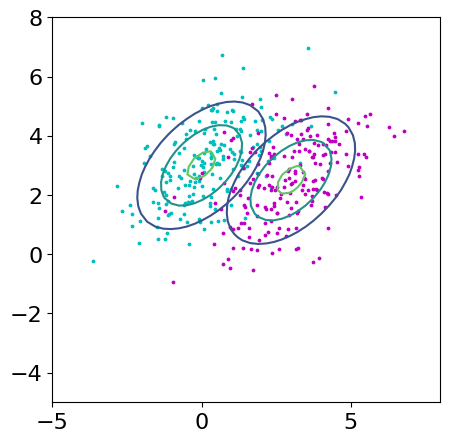

In [34]:
NumDataPerClass = 200

m1 = [[0, 3]]
m2 = [[3, 2.5]]

C = [[2, 1], [1, 2]]

A = np.linalg.cholesky(C)
U1 = np.random.randn(NumDataPerClass,2)
Y1 = U1 @ A.T + m1
U2 = np.random.randn(NumDataPerClass,2)
Y2 = U2 @ A.T + m2

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(Y1[:,0], Y1[:,1], c="c", s=3)
ax.scatter(Y2[:,0], Y2[:,1], c="m", s=3)
ax.set_xlim(-5, 8)
ax.set_ylim(-5, 8)

nx, ny = 50, 50
m1 = np.array([0,3])
m2 = np.array([3,2.5])
C = np.array(C, np.float32)

Xp1, Yp1, Zp1 = twoDGaussianPlot (nx, ny, m1, C)
plt.contour(Xp1, Yp1, Zp1, 3)

Xp2, Yp2, Zp2 = twoDGaussianPlot (nx, ny, m2, C)
plt.contour(Xp2, Yp2, Zp2, 3)

3D view of above plot with probability densities at z-axis for each (x, y) pairs

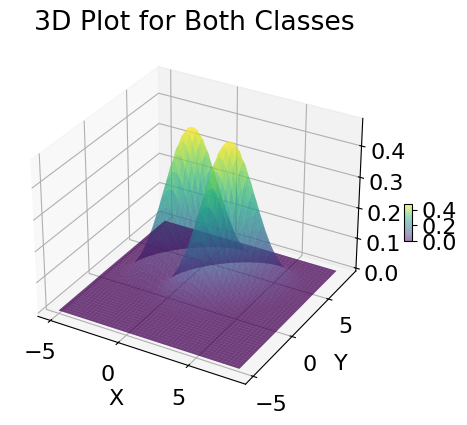

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you already have X, Y, and Z for both classes from posteriorPlot function

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surfaces for class 1
surf1 = ax.plot_surface(Xp1, Yp1, Zp1, cmap='viridis', alpha=0.5)

# Plot the surfaces for class 2
surf2 = ax.plot_surface(Xp2, Yp2, Zp2, cmap='viridis', alpha=0.5)

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('3D Plot for Both Classes')

# Add color bar
fig.colorbar(surf1, ax=ax, shrink=0.1, aspect=5)

plt.show()


##### posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2):
+ This function calculates the posterior probability of a two-class problem.
+ It generates a 2D grid of points using nx and ny, ranging from -5 to 5 along both dimensions.
+ For each point on the grid, it calculates the posterior probability using Bayes' theorem.
+ Bayes' theorem states:
<img src="prosterior_probability_formula.png" alt="Alt text" style="display: block; margin-left: 0; margin-right: auto; width: 400px;"/>
where P(C1∣x) is the posterior probability of class 1 given the observation x, P(x∣Ci) is the likelihood of observing x given class i, and P(Ci) is the prior probability of class i.
+ In this case, P(x∣Ci) is represented by the gauss2D function, which calculates the probability density of observing point x given mean mi and covariance matrix Ci.
+ P1 and P2 are the prior probabilities of class 1 and class 2 respectively.
+ The function returns three arrays: X-coordinates, Y-coordinates, and the corresponding posterior probabilities(Z-coordinates).

In summary, this function calculates the posterior probability of class 1 given an observation for each point on a 2D grid. It uses Bayes' theorem and the Gaussian probability density function to compute these probabilities.

In the context of the posteriorPlot function:
+ P(C1∣x) is the posterior probability of class 1 given the observation x.
+ P(x∣Ci) is the likelihood of observing x given class i. This is calculated using the Gaussian probability density function (represented by the gauss2D function).
+ P(Ci) is the prior probability of class i, represented by P1 and P2 in the function.
+ P(x) is the total probability of observing x, which is not explicitly calculated in the function.


In [36]:
def posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2):
    x = np.linspace(-10, 10, nx)
    y = np.linspace(-10, 10, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            num = P1*gauss2D(xvec, m1, C1)
            den = P1*gauss2D(xvec, m1, C1) + P2*gauss2D(xvec, m2, C2)
            Z[i,j] = num / den
    return X, Y, Z

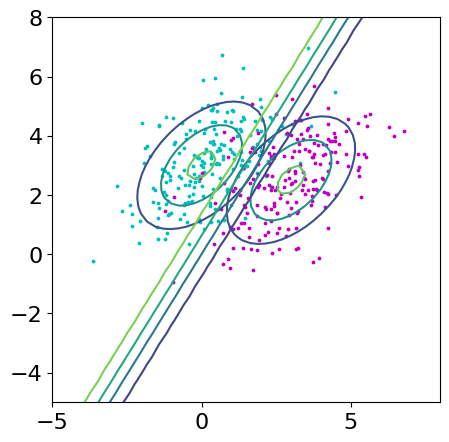

In [37]:
nx, ny = 50, 50

C = np.array(C, np.float32)

P1 = 0.5
P2 = 0.5

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(Y1[:,0], Y1[:,1], c="c", s=3)
ax.scatter(Y2[:,0], Y2[:,1], c="m", s=3)
ax.set_xlim(-5, 8)
ax.set_ylim(-5, 8)

plt.contour(Xp1, Yp1, Zp1, 3)
plt.contour(Xp2, Yp2, Zp2, 3)

Xp, Yp, Zp = posteriorPlot(nx, ny, m1, C, m2, C, P1, P2)
plt.contour(Xp, Yp, Zp, 5)


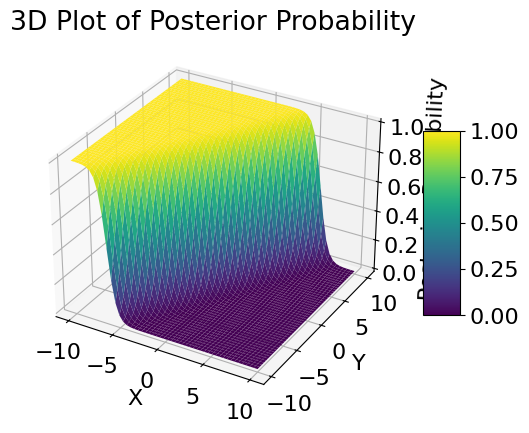

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you already have X, Y, and Z from posteriorPlot function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(Xp, Yp, Zp, cmap='viridis')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Posterior Probability')
ax.set_title('3D Plot of Posterior Probability')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


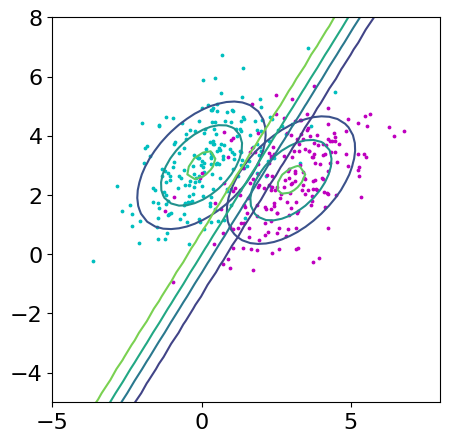

In [39]:
P1 = 0.7
P2 = 0.3

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(Y1[:,0], Y1[:,1], c="c", s=3)
ax.scatter(Y2[:,0], Y2[:,1], c="m", s=3)
ax.set_xlim(-5, 8)
ax.set_ylim(-5, 8)

plt.contour(Xp1, Yp1, Zp1, 3)
plt.contour(Xp2, Yp2, Zp2, 3)

Xp, Yp, Zp = posteriorPlot(nx, ny, m1, C, m2, C, P1, P2)
plt.contour(Xp, Yp, Zp, 5)

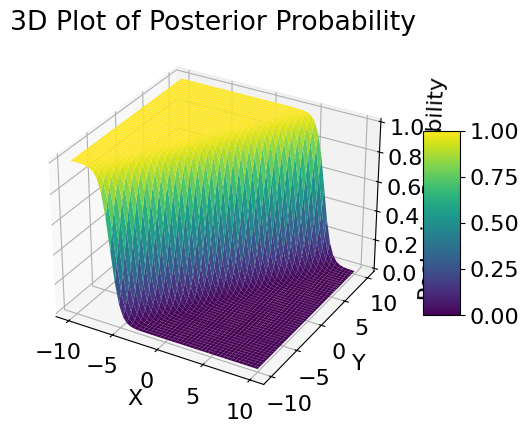

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you already have X, Y, and Z from posteriorPlot function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(Xp, Yp, Zp, cmap='viridis')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Posterior Probability')
ax.set_title('3D Plot of Posterior Probability')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


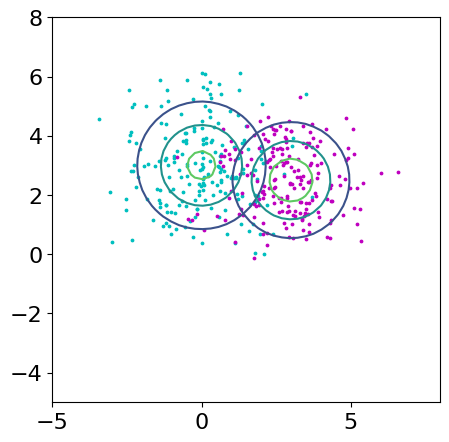

In [41]:
C1 = [[2, 0], [0, 2]]
C2 = [[1.5, 0], [0, 1.5]]

A1 = np.linalg.cholesky(C1)
A2 = np.linalg.cholesky(C2)
U1 = np.random.randn(NumDataPerClass,2)
Y1 = U1 @ A1.T + m1
U2 = np.random.randn(NumDataPerClass,2)
Y2 = U2 @ A2.T + m2

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(Y1[:,0], Y1[:,1], c="c", s=3)
ax.scatter(Y2[:,0], Y2[:,1], c="m", s=3)
ax.set_xlim(-5, 8)
ax.set_ylim(-5, 8)

nx, ny = 50, 50
m1 = np.array([0,3])
C1 = np.array(C1, np.float32)
Xp1, Yp1, Zp1 = twoDGaussianPlot (nx, ny, m1, C1)
plt.contour(Xp1, Yp1, Zp1, 3)
m2 = np.array([3,2.5])
C2 = np.array(C2, np.float32)
Xp2, Yp2, Zp2 = twoDGaussianPlot (nx, ny, m2, C2)
plt.contour(Xp2, Yp2, Zp2, 3)

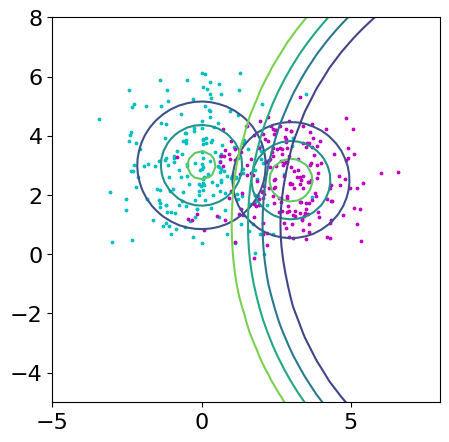

In [42]:
P1 = 0.5
P2 = 0.5

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(Y1[:,0], Y1[:,1], c="c", s=3)
ax.scatter(Y2[:,0], Y2[:,1], c="m", s=3)
ax.set_xlim(-5, 8)
ax.set_ylim(-5, 8)

plt.contour(Xp1, Yp1, Zp1, 3)
plt.contour(Xp2, Yp2, Zp2, 3)

Xp, Yp, Zp = posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2)
plt.contour(Xp, Yp, Zp, 5)

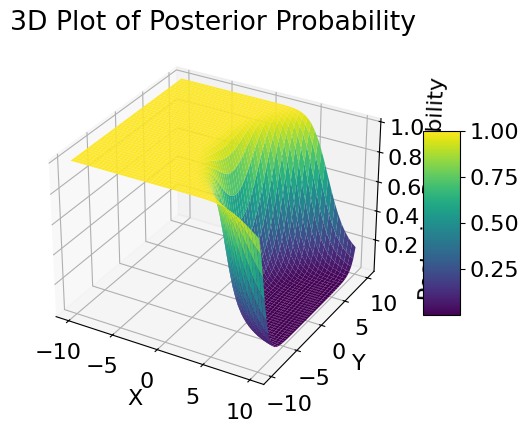

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you already have X, Y, and Z from posteriorPlot function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(Xp, Yp, Zp, cmap='viridis')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Posterior Probability')
ax.set_title('3D Plot of Posterior Probability')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


### 2. Fisher LDA and ROC Curve

The Fisher Linear Discriminant (FLD) is a technique used for linear dimensionality reduction and classification. It finds the linear combination of features (or variables) that best separates two or more classes. The FLD direction is often computed using the means and covariance matrices of the classes involved.

The FLD direction, wF is calculated as follows:
<img src="fisher_discriminant_direction_formula.png" alt="Alt text" style="display: block; margin-left: 0; margin-right: auto; width: 250px;"/>

Where:<br/>
C1 and C2 are the covariance matrices of the two classes. m1 and m2 are the means of the two classes.

<img src="example_fisher_LDA.jpg" alt="Alt text" style="display: block; margin-left: 0; margin-right: auto; width: 800px;"/>

#### 2.1  Plot contours on the two densities

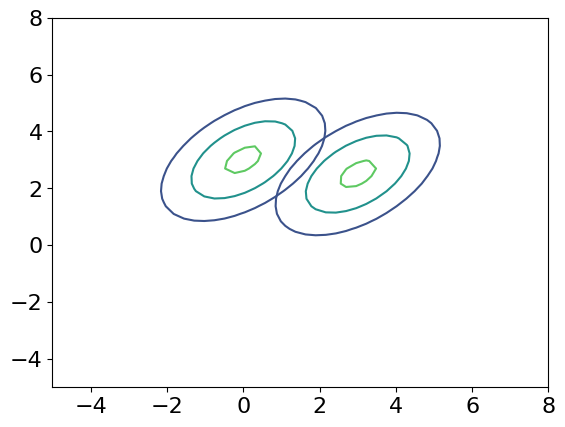

In [44]:
m1 = np.array([0,3])
m2 = np.array([3, 2.5])

C = [[2, 1], [1, 2]]

nx, ny = 50, 50
m1 = np.array([0,3])
m2 = np.array([3,2.5])
C = np.array(C, np.float32)

Xp1, Yp1, Zp1 = twoDGaussianPlot (nx, ny, m1, C)
plt.contour(Xp1, Yp1, Zp1, 3)

Xp2, Yp2, Zp2 = twoDGaussianPlot (nx, ny, m2, C)
plt.contour(Xp2, Yp2, Zp2, 3)

#### 2.2 Draw 200 samples from each of the two distributions and plot them on top of the contours.

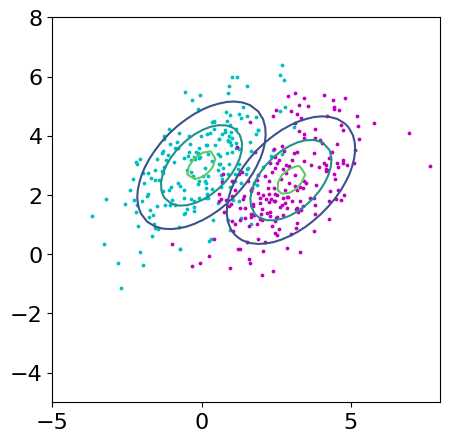

In [45]:
NumDataPerClass = 200

A = np.linalg.cholesky(C)
U1 = np.random.randn(NumDataPerClass,2)
Y1 = U1 @ A.T + m1
U2 = np.random.randn(NumDataPerClass,2)
Y2 = U2 @ A.T + m2

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(Y1[:,0], Y1[:,1], c="c", s=3)
ax.scatter(Y2[:,0], Y2[:,1], c="m", s=3)
ax.set_xlim(-5, 8)
ax.set_ylim(-5, 8)

Xp1, Yp1, Zp1 = twoDGaussianPlot (nx, ny, m1, C)
plt.contour(Xp1, Yp1, Zp1, 3)

Xp2, Yp2, Zp2 = twoDGaussianPlot (nx, ny, m2, C)
plt.contour(Xp2, Yp2, Zp2, 3)

3D view of above distributions

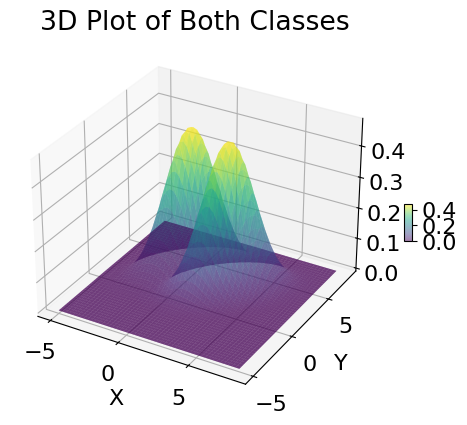

In [46]:
# Assuming you already have X, Y, and Z for both classes from posteriorPlot function

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surfaces for class 1
surf1 = ax.plot_surface(Xp1, Yp1, Zp1, cmap='viridis', alpha=0.5)

# Plot the surfaces for class 2
surf2 = ax.plot_surface(Xp2, Yp2, Zp2, cmap='viridis', alpha=0.5)

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('3D Plot of Both Classes')

# Add color bar
fig.colorbar(surf1, ax=ax, shrink=0.1, aspect=5)

plt.show()

#### 2.3 Compute the Fisher Linear Discriminant direction using the means and covariance matrices of the problem, and plot the discriminant direction

[ 0.85165832 -0.52409743]


(-5.0, 8.0)

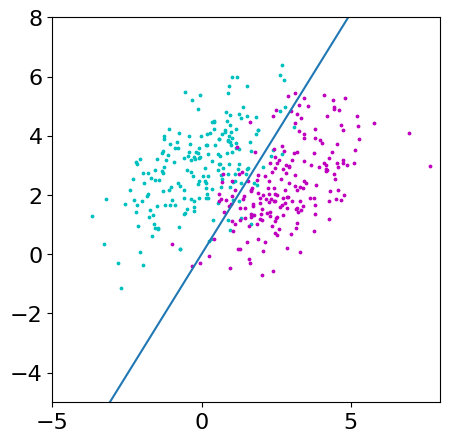

In [47]:
import matplotlib

Ci = np.linalg.inv(2*C)
wF = Ci @ (m2-m1)
uF = wF/np.linalg.norm(wF)
print(uF)

x = np.linspace(-5,8,100)
y = -uF[0]/uF[1]*x

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x,y)

ax.scatter(Y1[:,0], Y1[:,1], c="c", s=3)
ax.scatter(Y2[:,0], Y2[:,1], c="m", s=3)
ax.set_xlim(-5, 8)
ax.set_ylim(-5, 8)


#### 2.4 Project the data onto the Fisher discriminant directions and plot histograms of the distribution of projections

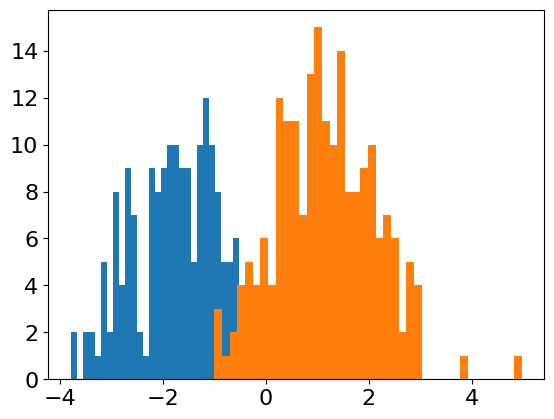

In [48]:
yp1 = Y1 @ uF
yp2 = Y2 @ uF
matplotlib.rcParams.update({'font.size': 16})
plt.hist(yp1, bins=40)
plt.hist(yp2, bins=40)
plt.savefig('histogramprojections.png')

#### 2.5 Compute and plot the Receiver Operating Characteristic (ROC) curve, by sliding a decision threshold, and computing the True Positive and False Positive rates (see code snippet in Appendix and example of an ROC curve in Fig. 2(b). or above figure)

#### ROC Curve

References:<br/>
+ https://www.youtube.com/watch?v=QBVzZBsif20

The ROC curve is a plot of the true positive rate (sensitivity) against the false positive rate (1 - specificity) for various threshold values. Each point on the curve represents the performance of the classifier at a particular threshold. A perfect classifier would have an ROC curve that passes through the top-left corner (TPR = 1, FPR = 0), indicating high sensitivity and specificity across all threshold values.

The AUC represents the overall performance of the classifier across all possible thresholds. It quantifies the classifier's ability to discriminate between positive and negative classes. A higher AUC indicates better performance, with a maximum value of 1 for a perfect classifier and 0.5 for a random classifier.

<img src="true_positive_1.png" alt="Alt text" style="display: inline; margin-left: 0; margin-right: auto; width: 600px;"/> <img src="true_positive_2.png" alt="Alt text" style="display: inline; margin-left: 0; margin-right: auto; width: 600px;"/>

<img src="false_positive_1.png" alt="Alt text" style="display: inline; margin-left: 0; margin-right: auto; width: 600px;"/> <img src="false_positive_2.png" alt="Alt text" style="display: inline; margin-left: 0; margin-right: auto; width: 600px;"/>

##### ploting ROC curve
1. Define a range for threshold sliding:
+ pmin and pmax are calculated as the minimum and maximum values from the predicted scores (yp1 and yp2) of the two classes.
+ This range will be used to slide the threshold value for classifying the samples.

2. Set up an array of thresholds:
+ nRocPoints defines the number of thresholds to consider.
+ thRange is an array of threshold values ranging from pmin to pmax with nRocPoints evenly spaced intervals.

3. Compute True Positives and False Positives at each threshold:
+ For each threshold value in thRange, the code calculates the percentage of true positives (TP) and false positives (FP) at that threshold.
+ True positives are the percentage of samples from class 2 with predicted scores above the threshold.
+ False positives are the percentage of samples from class 1 with predicted scores above the threshold.
+ These values are stored in the ROC array.

4. Plot ROC curve:
+ The ROC curve is plotted using the false positive rates (FP) on the x-axis and the true positive rates (TP) on the y-axis.
+ ROC[:,1] represents the false positive rates, and ROC[:,0] represents the true positive rates.
+ The curve is plotted using ax.plot() with a magenta color ('m').
+ Axis labels, title, and grid are added to the plot.

-3.7971714798502254 4.971240609818487


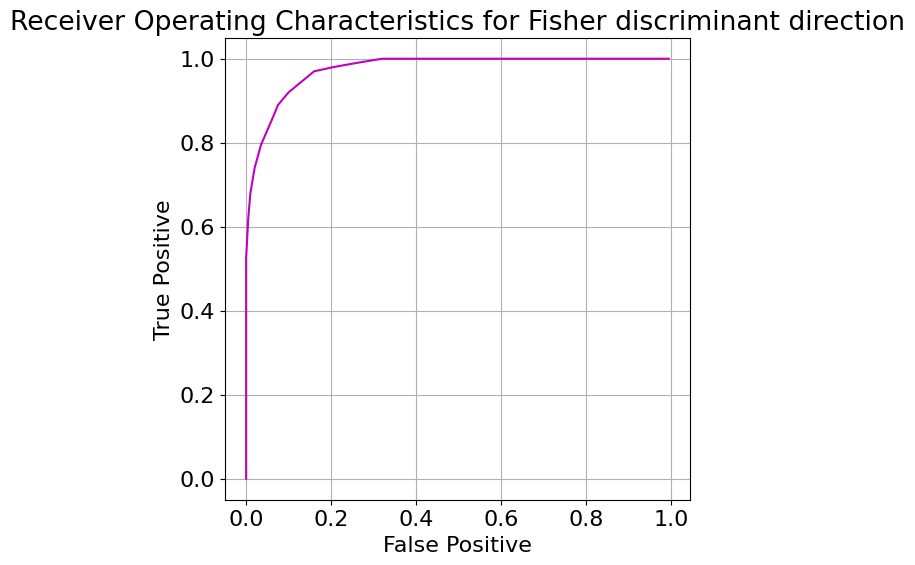

In [49]:
# Define a range over which to slide a threshold
#
pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
print(pmin, pmax)
# Set up an array of thresholds
#
nRocPoints = 50
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC = np.zeros( (nRocPoints, 2) )
# Compute True Positives and False positives at each threshold
#
for i in range(len(thRange)):
    thresh = thRange[i]
    TP = len(yp2[yp2 > thresh]) * 1 / len(yp2)
    FP = len(yp1[yp1 > thresh]) * 1 / len(yp1)
    ROC[i,:] = [TP, FP]
# Plot ROC curve
#
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ROC[:,1], ROC[:,0], c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics for Fisher discriminant direction')
ax.grid(True)
plt.savefig('rocCurve1.png')

#### 2.6 Area under the curve

In [50]:
print("area =", np.trapz(ROC[::-1,0], ROC[::-1,1]))

area = 0.9704750000000001


optimize the threshold based on a specific criterion, such as "maximizing" the Youden's index (J = Sensitivity+Specificity−1 = TP-FP) or maximizing the area under the ROC curve (AUC). These approaches aim to balance the trade-off between true positive rate and false positive rate.

In [51]:
a = np.array(ROC[:,0]-ROC[:,1])
suitableThIndex = (np.where(a==max(a))[0][0]) # [0][0] for choosing the index of first occurance of maximum difference TPR - FPR (there can be multiple similar maximum differences)

#### 2.7  For a suitable choice of decision threshold, compute the classification accuracy.

In [52]:
print("suitable threshould =",thRange[suitableThIndex])

suitable threshould = -0.21822776978136282


#### 2.8 Plot the ROC curve (on the same scale) for

##### Projecting Classes onto a Random Direction

[[0.94517393]
 [0.32656737]]


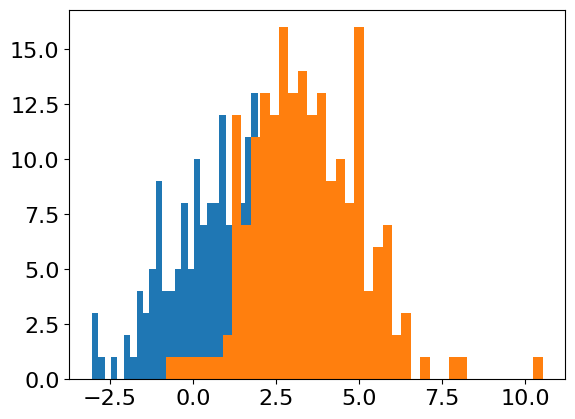

In [53]:
import matplotlib

wF = np.random.rand(2,1)
uF = wF/np.linalg.norm(wF)
print(uF)
yp1 = Y1 @ uF
yp2 = Y2 @ uF
matplotlib.rcParams.update({'font.size': 16})
plt.hist(yp1, bins=40)
plt.hist(yp2, bins=40)
plt.savefig('histogramprojections.png')

-3.046786181327098 10.537386296495363


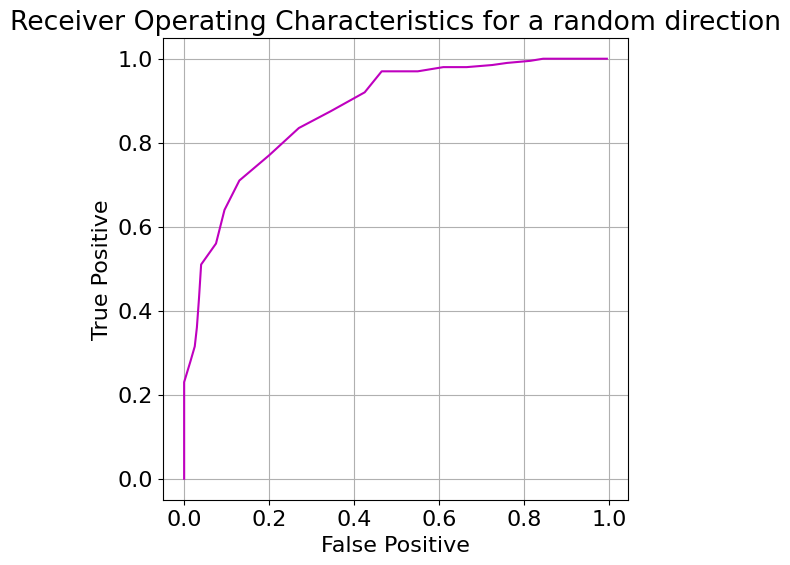

In [54]:
# Define a range over which to slide a threshold
#
pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
print(pmin, pmax)
# Set up an array of thresholds
#
nRocPoints = 50
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC = np.zeros( (nRocPoints, 2) )
# Compute True Positives and False positives at each threshold
#
for i in range(len(thRange)):
    thresh = thRange[i]
    TP = len(yp2[yp2 > thresh]) * 1 / len(yp2)
    FP = len(yp1[yp1 > thresh]) * 1 / len(yp1)
    ROC[i,:] = [TP, FP]
# Plot ROC curve
#
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ROC[:,1], ROC[:,0], c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics for a random direction')
ax.grid(True)
plt.savefig('rocCurve2.png')

Area under the ROC Curve

In [55]:
print("area =",np.trapz(ROC[::-1,0], ROC[::-1,1]))

area = 0.8717375


##### For direction connecting the means

[ 0.98639392 -0.16439899]


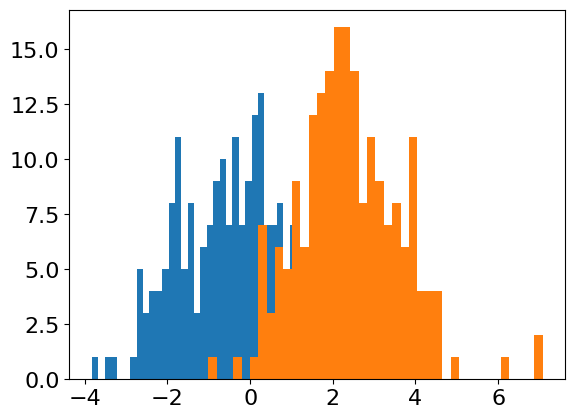

In [56]:
import matplotlib

wF = m2-m1
uF = wF/np.linalg.norm(wF)
print(uF)
yp1 = Y1 @ uF
yp2 = Y2 @ uF
matplotlib.rcParams.update({'font.size': 16})
plt.hist(yp1, bins=40)
plt.hist(yp2, bins=40)
plt.savefig('histogramprojections.png')

-3.8290063273222996 7.080454197192552


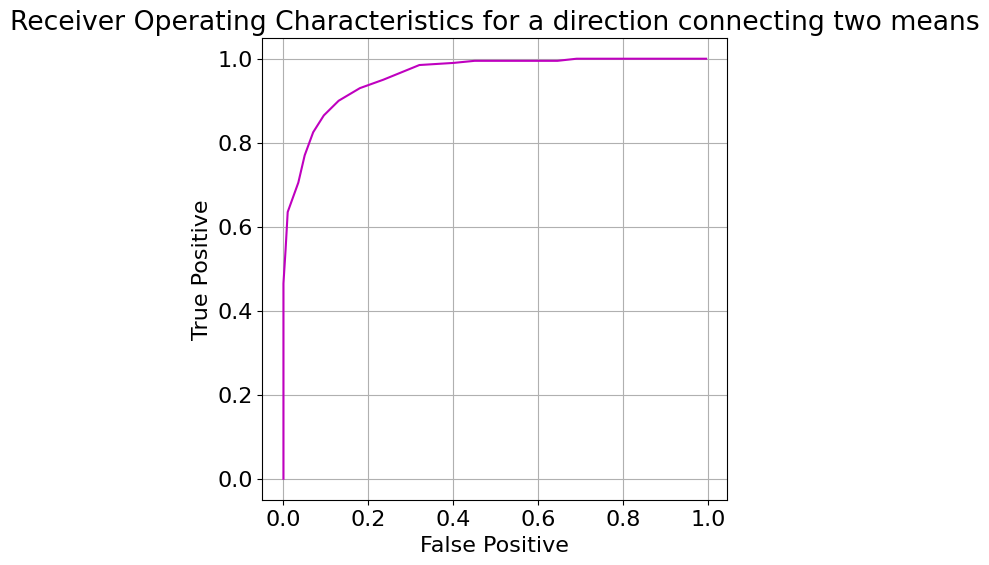

In [57]:
# Define a range over which to slide a threshold
#
pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
print(pmin, pmax)
# Set up an array of thresholds
#
nRocPoints = 50
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC = np.zeros( (nRocPoints, 2) )
# Compute True Positives and False positives at each threshold
#
for i in range(len(thRange)):
    thresh = thRange[i]
    TP = len(yp2[yp2 > thresh]) * 1 / len(yp2)
    FP = len(yp1[yp1 > thresh]) * 1 / len(yp1)
    ROC[i,:] = [TP, FP]
# Plot ROC curve
#
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ROC[:,1], ROC[:,0], c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics for a direction connecting two means')
ax.grid(True)
plt.savefig('rocCurve3.png')

Area under the ROC Curve

In [58]:
print("area =",np.trapz(ROC[::-1,0], ROC[::-1,1]))

area = 0.9534750000000001


### 3. Mahalanobies Distance

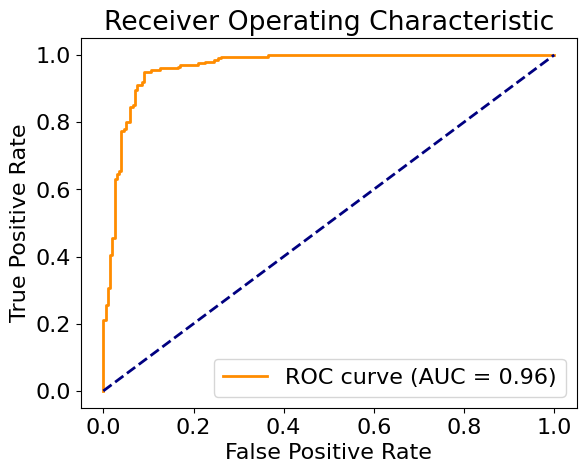

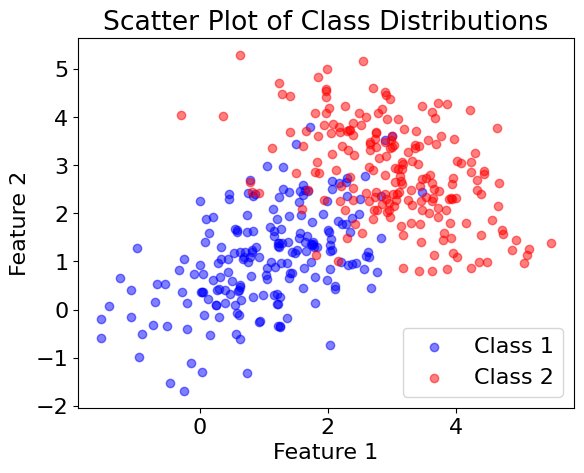

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def mahalanobis_distance(x, mu, cov):
    # Calculate the Mahalanobis distance
    diff = x - mu
    inv_cov = np.linalg.inv(cov)
    dist = np.sqrt(np.dot(np.dot(diff, inv_cov), diff.T))
    return dist

# Generate random datasets from normal distributions
np.random.seed(0)  # for reproducibility
num_samples = 200
mu1 = np.array([1, 1])
cov1 = np.array([[1, 0.5], [0.5, 1]])
class1_data = np.random.multivariate_normal(mu1, cov1, num_samples)

mu2 = np.array([3, 3])
cov2 = np.array([[1, -0.5], [-0.5, 1]])
class2_data = np.random.multivariate_normal(mu2, cov2, num_samples)

# Combine the datasets
X = np.vstack((class1_data, class2_data))
y = np.hstack((np.zeros(num_samples), np.ones(num_samples)))  # class labels

# Calculate the Mahalanobis distances
mu1_est = np.mean(class1_data, axis=0)
mu2_est = np.mean(class2_data, axis=0)
cov_est = np.cov(X.T)  # pooled covariance matrix

distances = np.zeros(X.shape[0])
for i, x in enumerate(X):
    distances[i] = mahalanobis_distance(x, mu1_est, cov_est) - mahalanobis_distance(x, mu2_est, cov_est)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, distances)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the distributions as scatter plot
plt.figure()
plt.scatter(class1_data[:, 0], class1_data[:, 1], label='Class 1', c='blue', alpha=0.5)
plt.scatter(class2_data[:, 0], class2_data[:, 1], label='Class 2', c='red', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Class Distributions')
plt.legend()
plt.show()
